### Ковальчук Алексей

- telegram: @analitiqq
- instagram: @analitiq
- web-site: http://analitiq.ru

faq: Данный код будет отрисовывать данные по соотношению курса Валюты_1 к Валюте_2. Данные взяты с сайта https://ru.investing.com/. Также на графике будут отмечены уровни и добавлена статистика по курсу за последний месяц.

In [ ]:
#Импорт библиотек
import yfinance as yf
import yahoofinancials
import investpy
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import date
import datetime as dt
plt.style.use('fivethirtyeight') # специальное отображение графиков для pyplot

In [21]:
def currency_analytics(cur_1,cur_2):
    '''cur_1: first currency, cur_2: second currency'''
    current_date = str(date.today().day) + '/'+ str(date.today().month) +'/' + str(date.today().year)
    df = investpy.get_currency_cross_historical_data(currency_cross='USD/RUB', from_date='01/01/2019', to_date=current_date)
    
    timeD = dt.timedelta(days=30)
    #Pivot points (upper)
    pivots_1 = []
    dates_1 = []
    counter_1 = 0
    lastPivot_1 = 0

    Range_1 = [0,0,0,0,0,0,0,0,0,0]
    dateRange_1 = [0,0,0,0,0,0,0,0,0,0]

    for i in df.index:
        currentMax = max(Range_1,default = 0)
        value_1 = round(df['Close'][i],2)

        Range_1 = Range_1[1:9]
        Range_1.append(value_1)
        dateRange_1 = dateRange_1[1:9]
        dateRange_1.append(i)

        if currentMax == max(Range_1,default = 0):
            counter_1+=1
        else:
            counter_1 =0
        if counter_1 == 5:
            lastPivot_1=currentMax
            dateloc_1 = Range_1.index(lastPivot_1)
            lastDate_1 = dateRange_1[dateloc_1]
            pivots_1.append(lastPivot_1)
            dates_1.append(lastDate_1)
            
    #Pivot points (lower)
    pivots_2 = []
    dates_2 = []
    counter_2 = 0
    lastPivot_2 = 0

    Range_2 = [999999]*10
    dateRange_2 = [0,0,0,0,0,0,0,0,0,0]

    for i in df.index:
        currentMin = min(Range_2,default = 0)
        value_2 = round(df['Close'][i],2)

        Range_2 = Range_2[1:9]
        Range_2.append(value_2)
        dateRange_2 = dateRange_2[1:9]
        dateRange_2.append(i)

        if currentMin == min(Range_2,default = 0):
            counter_2+=1
        else:
            counter_2 =0
        if counter_2 == 5:
            lastPivot_2=currentMin
            dateloc_2 = Range_2.index(lastPivot_2)
            lastDate_2 = dateRange_2[dateloc_2]
            pivots_2.append(lastPivot_2)
            dates_2.append(lastDate_2)
    #Print the plot
    plt.figure(figsize = (12.6,4.6))
    plt.title(cur_1+' / '+ cur_2 + ' history')
    plt.xlabel('01/01/2019 - '+ current_date)
    plt.ylabel('Close price')
    plt.plot(df['Close'], label = cur_1+' / '+cur_2 ,alpha = 0.5)
    for index in range(len(pivots_1)):
        plt.plot_date([dates_1[index],dates_1[index]+timeD],[pivots_1[index],pivots_1[index]], linestyle ='-',linewidth = 2,marker = ",",color = 'green')
    for index in range(len(pivots_2)):
        plt.plot_date([dates_2[index],dates_2[index]+timeD],[pivots_2[index],pivots_2[index]], linestyle ='-',linewidth = 2,marker = ",",color = 'red')
    plt.legend(loc = 'upper left') 
    plt.show()

    print('Dates / Prices of pivot points (upper):')
    for index in range(len(pivots_1)):
        print(str(dates_1[index].date())+': '+str(pivots_1[index]))
    print()
    print('Dates / Prices of pivot points (lower):')
    for index in range(len(pivots_2)):
        print(str(dates_2[index].date())+': '+str(pivots_2[index]))

In [30]:
def Last_Month(cur_1,cur_2):
    current_date = str(date.today().day) + '/'+ str(date.today().month) +'/' + str(date.today().year)
    df = investpy.get_currency_cross_historical_data(currency_cross='USD/RUB', from_date='01/01/2019', to_date=current_date)
    
    plt.figure(figsize = (12.6,4.6))
    plt.plot(df['Close'][-30:], label = cur_1+' / '+ cur_2 ,alpha = 0.35)
    plt.title(cur_1+' / '+ cur_2 + ' history last 30 days')
    plt.xlabel('Last 30 days')
    plt.ylabel('Close price')
    plt.legend(loc = 'upper left')
    plt.show()
    print('Prices Last Five days of '+cur_1+' / '+ cur_2+' =',np.array(df['Close'][-5:][0]),';',np.array(df['Close'][-5:][1]),
         ';',np.array(df['Close'][-5:][2]),';',np.array(df['Close'][-5:][3]),';',np.array(df['Close'][-5:][4]))
    p_1 = abs(1-df['Close'][-5:][1]/df['Close'][-5:][0])
    if  df['Close'][-5:][1] >= df['Close'][-5:][0]:
        pp_1 = '+'+str(round(p_1*100,2))+'%'
    else: 
        pp_1 = '-'+str(round(p_1*100,2))+'%'
    p_2 = abs(1-df['Close'][-5:][2]/df['Close'][-5:][1])
    if  df['Close'][-5:][2] >= df['Close'][-5:][1]:
        pp_2 = '+'+str(round(p_2*100,2))+'%'
    else: 
        pp_2 = '-'+str(round(p_2*100,2))+'%'
    p_3 = abs(1-df['Close'][-5:][3]/df['Close'][-5:][2])
    if  df['Close'][-5:][3] >= df['Close'][-5:][2]:
        pp_3 = '+'+str(round(p_3*100,2))+'%'
    else: 
        pp_3 = '-'+str(round(p_3*100,2))+'%'
    p_4 = abs(1-df['Close'][-5:][4]/df['Close'][-5:][3])
    if  df['Close'][-5:][4] >= df['Close'][-5:][3]:
         pp_4 = '+'+str(round(p_4*100,2))+'%'
    else: 
        pp_4 = '-'+str(round(p_4*100,2))+'%'
    print('Percentage +/- of '+cur_1+' / '+ cur_2+' =',pp_1,';',pp_2,';',pp_3,';',pp_4,)

In [22]:
a = investpy.get_currency_cross_historical_data(currency_cross='USD/RUB', from_date='01/01/2018', to_date='10/06/2020')

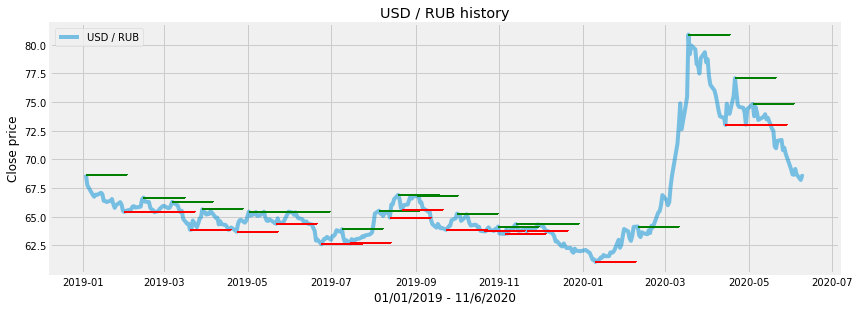

Dates / Prices of pivot points (upper):
2019-01-03: 68.66
2019-02-14: 66.65
2019-03-07: 66.28
2019-03-29: 65.63
2019-05-02: 65.44
2019-05-13: 65.43
2019-05-31: 65.43
2019-07-09: 63.9
2019-08-05: 65.52
2019-08-19: 66.9
2019-09-02: 66.8
2019-10-01: 65.26
2019-10-31: 64.13
2019-11-13: 64.35
2019-11-29: 64.32
2020-02-10: 64.13
2020-03-18: 80.87
2020-04-21: 77.07
2020-05-04: 74.82

Dates / Prices of pivot points (lower):
2019-01-31: 65.41
2019-02-22: 65.39
2019-03-20: 63.86
2019-04-23: 63.69
2019-05-22: 64.39
2019-06-24: 62.58
2019-07-15: 62.66
2019-08-13: 64.91
2019-08-22: 65.61
2019-09-23: 63.85
2019-10-21: 63.72
2019-11-05: 63.49
2019-11-21: 63.71
2020-01-10: 61.05
2020-04-14: 73.0
2020-04-29: 73.02


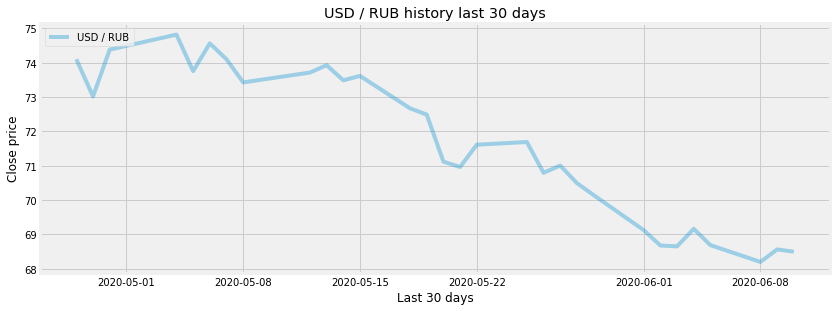

Prices Last Five days of USD / RUB = 69.1601 ; 68.686 ; 68.1966 ; 68.5617 ; 68.4949
Percentage +/- of USD / RUB = -0.69% ; -0.71% ; +0.54% ; -0.1%


In [31]:
currency_analytics('USD','RUB')
Last_Month('USD','RUB')